In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('./train.csv')

In [3]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_Y_01 = train_df.filter(regex='Y_01') # Output : Y_01 Feature..
train_Y_02 = train_df.filter(regex='Y_02')
train_Y_03 = train_df.filter(regex='Y_03')
train_Y_04 = train_df.filter(regex='Y_04')
train_Y_05 = train_df.filter(regex='Y_05')
train_Y_06 = train_df.filter(regex='Y_06')
train_Y_07 = train_df.filter(regex='Y_07')
train_Y_08 = train_df.filter(regex='Y_08')
train_Y_09 = train_df.filter(regex='Y_09')
train_Y_10 = train_df.filter(regex='Y_10')
train_Y_11 = train_df.filter(regex='Y_11')
train_Y_12 = train_df.filter(regex='Y_12')
train_Y_13 = train_df.filter(regex='Y_13')
train_Y_14 = train_df.filter(regex='Y_14')

In [6]:
a = [train_Y_01,train_Y_02,train_Y_03,train_Y_04,train_Y_05,train_Y_06,train_Y_07,train_Y_08,train_Y_09,train_Y_10,train_Y_11,train_Y_12,train_Y_13,train_Y_14]

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


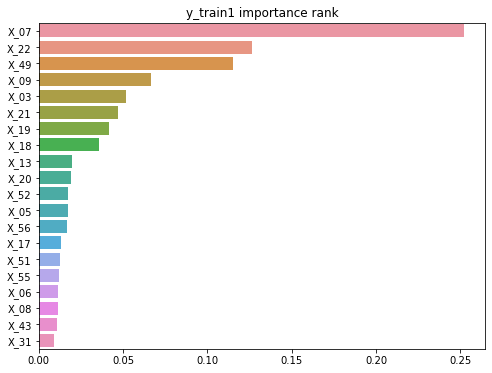

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


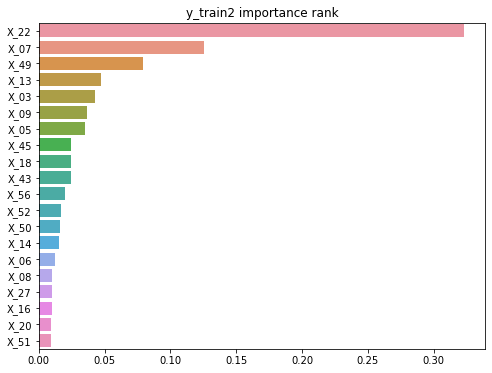

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


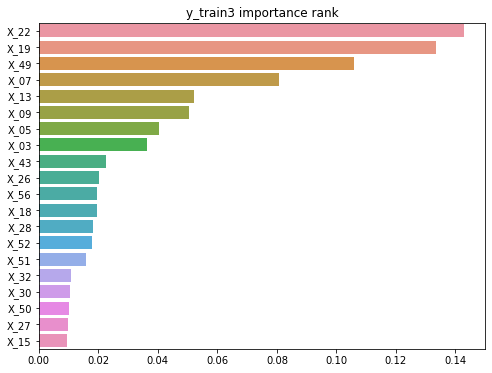

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


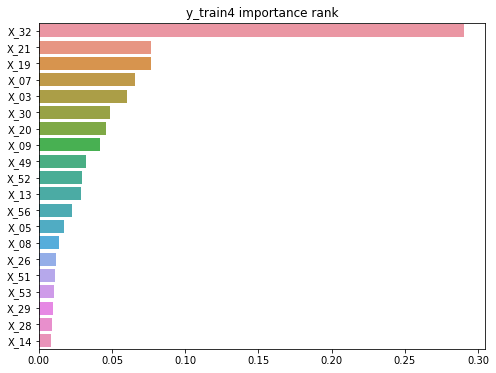

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


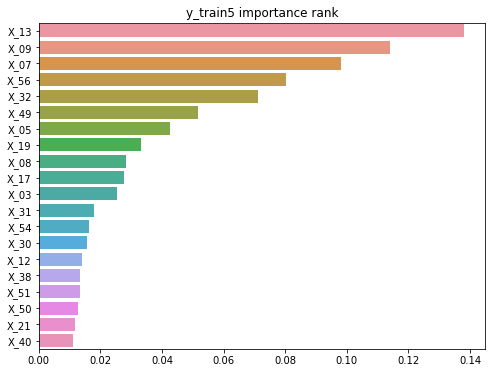

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


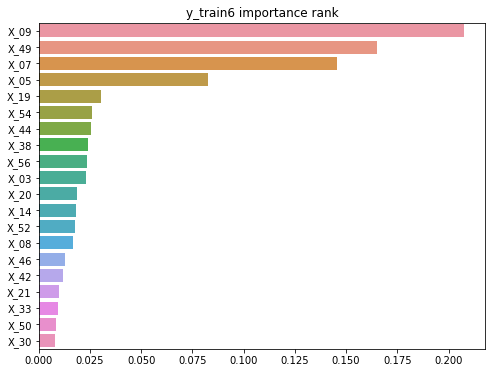

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


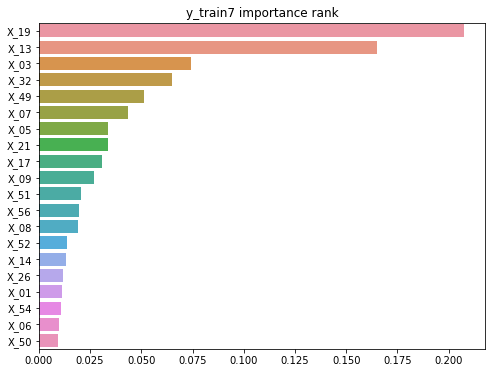

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


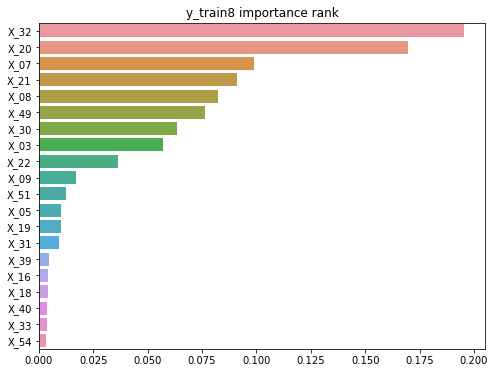

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


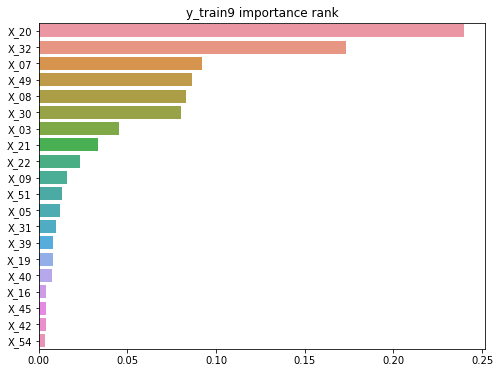

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


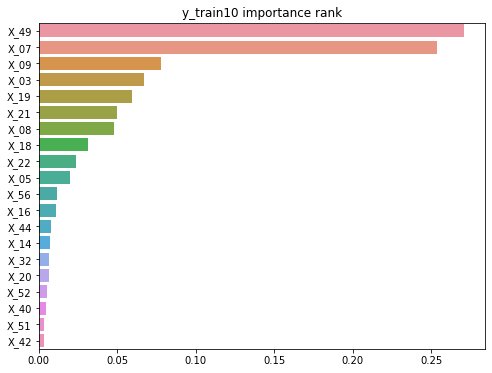

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


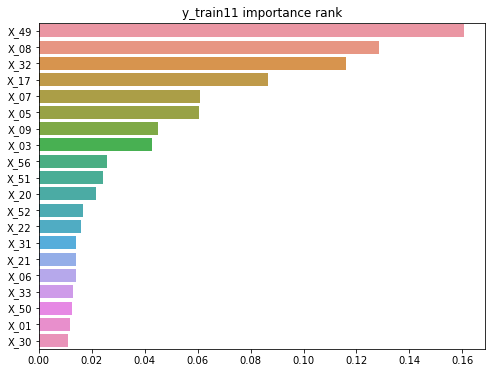

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


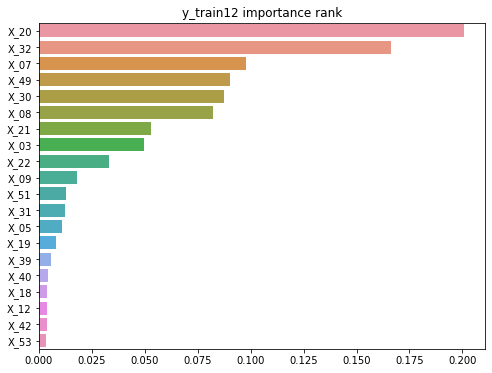

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


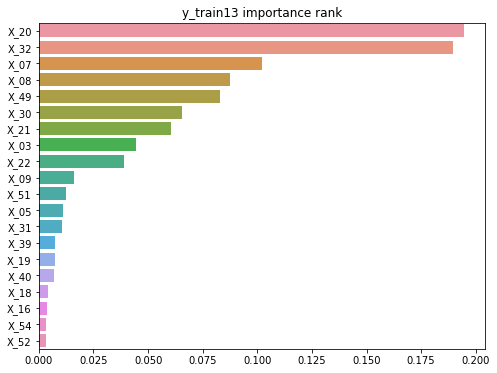

C:\Users\User\AppData\Local\Temp\ipykernel_3968\1305299897.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run = rf_run.fit(train_x, i)


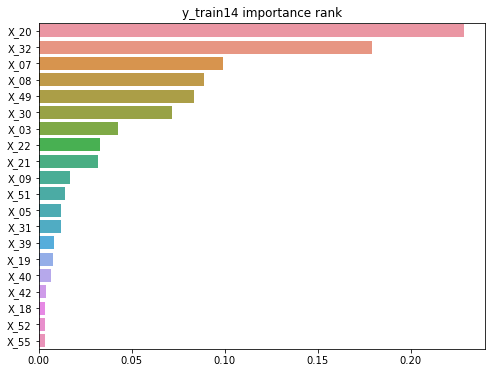

In [31]:
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
cnt = 1
for i in a:
    rf_run = rf_run.fit(train_x, i)
    model_import_plot(rf_run,cnt)
    cnt += 1

In [30]:
def model_import_plot(rf_run, i): 

    ftr_importances_values = rf_run.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
    ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
    plt.figure(figsize=(8, 6))
    plt.title(f"y_train{i} importance rank")
    sns.barplot(x=ftr_top, y=ftr_top.index)
    plt.show()


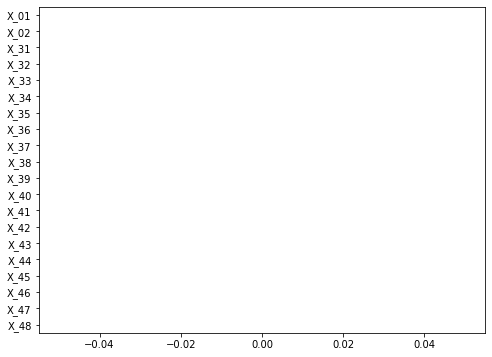

In [24]:
model_import_plot(rf_run)

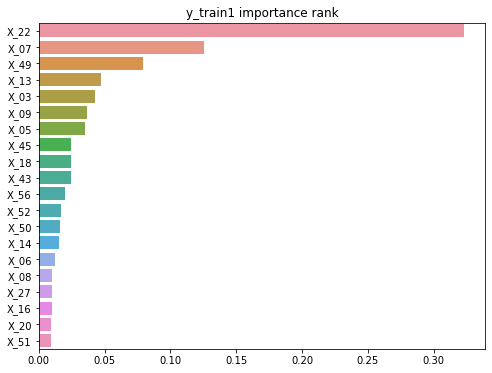

In [28]:
model_import_plot(rf_run1, 1)